<a href="https://colab.research.google.com/github/ShubhamDeshmukh27/Face-emotion-detection-deep-learning-project/blob/main/(Team_Notebook)Face_emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**

**Live Class Monitoring System(Face Emotion Recognition)**

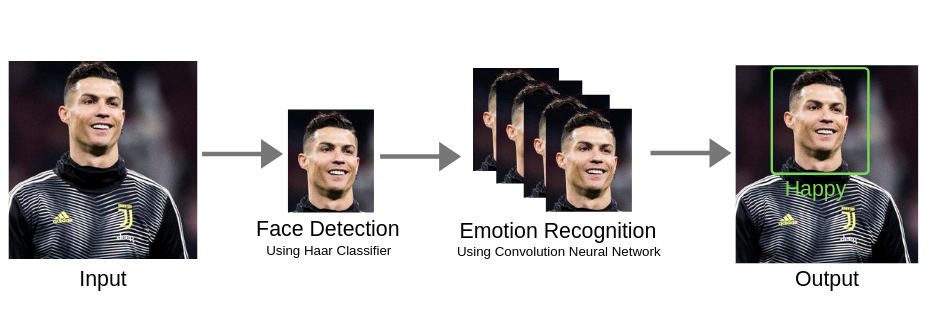

# **Project Introduction**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.


In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.


# **Problem Statements**

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.

The solution to this problem is by recognizing facial emotions.


# **What is Face Emotion Recognition?**

Facial emotion recognition is the process of detecting human emotions from facial expressions. The human brain recognizes emotions automatically, and software has now been developed that can recognize emotions as well.

# **Dataset Information:**

I have built a deep learning model which detects the real time emotions of students through a webcam so that teachers can understand if students are able to grasp the topic according to students' expressions or emotions and then deploy the model. The model is trained on the FER-2013 dataset .This dataset consists of 35887 grayscale, 48x48 sized face images with seven emotions - angry, disgusted, fearful, happy, neutral, sad and surprised.

###Here in this project we've used:


1.   DeepFace model
2.   ResNet Modell

3.   Xception Model
4.   Deep CNN Model

to detect face emotion And also used Opencv to detect face and emotion on live video. 


# **Importing Libraries**


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## CNN Models ##
import keras
import tensorflow as tf
from tensorflow.keras import optimizers
from keras.utils import np_utils
from keras.regularizers import l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, SeparableConv2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D,concatenate
from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import load_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Parameters

In [ ]:
batch_size = 32
num_epochs = 50
input_shape = (48, 48, 1)
validation_split = .2
verbose = 1
num_classes = 7
base_path = 'models/'
shape_x = 48
shape_y = 48
image_size=(48,48)

# **Reading the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Deep learning Project

/content/gdrive/MyDrive/Colab Notebooks/Deep learning Project


In [ ]:
# Converting our data from tar file to csv file
import tarfile

fname = 'fer2013.tar.gz'
if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
elif fname.endswith("tar"):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()

In [ ]:
# Reading CSV file
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Deep learning Project/fer2013/fer2013.csv')

In [ ]:
# Printing shape of the data
print(df.shape)

(35887, 3)


In [ ]:
# Return the first 5 rows.
df.head()

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [ ]:
# Return unique values emotion
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
# Dictionary mapping for individual emotions
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


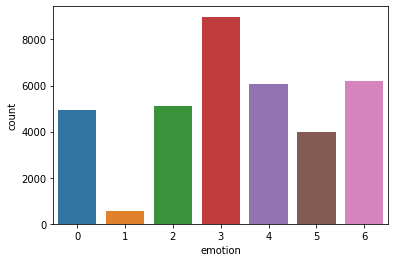

In [ ]:
# Plotting distribution of emotions
sns.countplot(df.emotion)
plt.show()

From above plot we can observe that majority of the classes belongs to **3:Happy**, **4:Sad** and **6:Neutral** on the otherside **1:disgust** and **5:surprise** are less in classes.


# **Displaying Images**

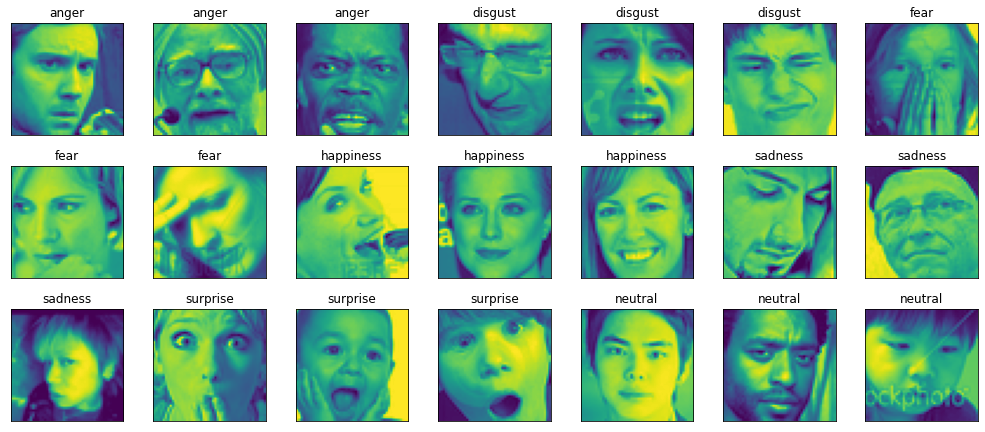

In [ ]:
# Visulize sample dataset
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

###**Preprocessing**

In [ ]:
df['pixels']=df['pixels'].astype("string") #converting dtype of pixels to string
pixels = df['pixels'].tolist() #Making list of pixels
width, height = 48, 48 # initializing image shape
faces = [] #Empty list
# Making images as required for our models  
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.strip().split(' ',48*48)]
    face = np.asarray(face).reshape(width, height)
    face = cv2.resize(face.astype('uint8'),image_size)
    faces.append(face.astype('float32'))
# Converting to array and dimension for transfer Learning
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)
faces /= 127.5 # normalizing the data
faces -= 1.
# Converting Emotions to numpy array
emotions = pd.get_dummies(df['emotion']).to_numpy()

## Data Augmentation

**Data Augmentation**:- taking the batch and apply some series of random transformations (random rotation, resizing, shearing) to increase generalizability of model.

In [ ]:
# data generator Generate batches of tensor image data with real-time data augmentation
data_generator = ImageDataGenerator(
                        featurewise_center=False,#Set input mean to 0 over the dataset, feature-wise.
                        featurewise_std_normalization=False,# Divide inputs by std of the dataset, feature-wise.
                        rotation_range=10,      # randomly rotate images in the range (degrees, 0 to 180)
                        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                        height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
                        zoom_range=.1,          # randomly zoom into images
                        horizontal_flip=True)   # randomly flip images

**ImageDataGenerator**

horizontal and vertical shift => moving all pixels of image in one direction

1. width_shift_range ( horizonatal shift)

2. height_shift_range (vertical shift)
3. floating num [0- 1] --> % of shift

*  horizontal n vertical flips augmentation ==>reversing rows or cols of pixels --> True or False

*  Random rotation --> 0 - 360 degrees --> rotation_range = 90 ==> means random rotation to image blw 0 and 90 degrees
*  random brightness --> randomly darkens or brightens images ==> brightness_range =[0.2,1.0] --> means darkens or brightens if pixel is blw 0.2 and 1
*  random zoom
1. either adds pixel or subtract pixels in image . [1-value, 1+value]
2. for example , zoom_range = .3 --> range [0.7, 1.3] or blw 70%(zoom in) and 130% (zoomout)


# **Splitting data into train and test datset**

In [ ]:
#train test split
xtrain, xtest,ytrain,ytest = train_test_split(faces, emotions,test_size=0.3,shuffle=True)
xval,xtest,yval,ytest=train_test_split(xtest,ytest,test_size=0.3,shuffle=True)

In [ ]:
# Checking shapes
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape, xval.shape, xtest.shape, yval.shape, ytest.shape

((25120, 48, 48, 1),
 (3231, 48, 48, 1),
 (25120, 7),
 (3231, 7),
 (7536, 48, 48, 1),
 (3231, 48, 48, 1),
 (7536, 7),
 (3231, 7))

## Method 1: Directly Using DeepFace :

Deepface is a lightweight face recognition and facial attribute analysis (age, gender, emotion and race) framework for python. 


[PAPER](https://en.wikipedia.org/wiki/DeepFace)

In [ ]:
# Installing DeepFace
!pip install deepface

In [ ]:
# Upload A file from local Drive
from google.colab import files
uploaded = files.upload()

Saving images (1).jpg to images (1).jpg


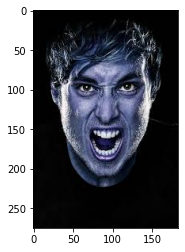

In [ ]:
# Image Show
import cv2
import matplotlib.pyplot as plt
img_array=cv2.imread("images (1).jpg")
plt.imshow(img_array)

In [ ]:
# Analyze Image using DeepFace
from deepface import DeepFace
obj = DeepFace.analyze(img_path = "images (1).jpg", actions = ['age', 'gender', 'race', 'emotion'])
print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

27  years old  white   fear   Man


The actual emotion in the Picture above is Angry Face but using DeepFace I found the prediction is fear.

It's Better to train our own model.


## Method 2: ResNet

[Paper](https://d2l.ai/chapter_convolutional-modern/resnet.html)

![](https://www.researchgate.net/publication/338603223/figure/fig1/AS:847598516711425@1579094642237/ResNet-50-architecture-26-shown-with-the-residual-units-the-size-of-the-filters-and.png)

**ResNet-50** architecture shown with the residual units, the size of the filters and the outputs of each convolutional layer. DRF extracted from the last convolutional layer of this network is also shown. Key: The notation k × k, n in the convolutional layer block denotes a filter of size k and n channels. FC 1000 denotes the fully connected layer with 1000 neurons. The number on the top of the convolutional layer block represents the repetition of each unit. nClasses represents the number of output classes.


In [ ]:
# Giving address of resnet50 weights
WEIGHTS_PATH = ('https://github.com/fchollet/deep-learning-models/'
                'releases/download/v0.2/'
                'resnet50_weights_tf_dim_ordering_tf_kernels.h5')
WEIGHTS_PATH_NO_TOP = ('https://github.com/fchollet/deep-learning-models/'
                       'releases/download/v0.2/'
                       'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

backend = None
layers = None
models = None
keras_utils = None

# Building up model architecture

# Defining the identity block
def identity_block(input_tensor, kernel_size, filters, stage, block):
    filters1, filters2, filters3 = filters
    bn_axis = 3
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = keras.layers.Conv2D(filters1, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = keras.layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(filters2, kernel_size,
                      padding='same',
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b')(x)
    x = keras.layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2c')(x)
    x = keras.layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = keras.layers.add([x, input_tensor])
    x = keras.layers.Activation('relu')(x)
    return x

# Defining convolutional block
def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):

    filters1, filters2, filters3 = filters
    bn_axis = 3
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = keras.layers.Conv2D(filters1, (1, 1), strides=strides,
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = keras.layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(filters2, kernel_size, padding='same',
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b')(x)
    x = keras.layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2c')(x)
    x = keras.layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = keras.layers.Conv2D(filters3, (1, 1), strides=strides,
                             kernel_initializer='he_normal',
                             name=conv_name_base + '1')(input_tensor)
    shortcut = keras.layers.BatchNormalization(
        axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = keras.layers.add([x, shortcut])
    x = keras.layers.Activation('relu')(x)
    return x

# Defining resnet50 
def ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=input_shape, pooling=None, classes=7):

    if not (weights in {'imagenet', None} or os.path.exists(weights)):
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization), `imagenet` '
                         '(pre-training on ImageNet), '
                         'or the path to the weights file to be loaded.')

    if weights == 'imagenet' and include_top and classes != 7:
        raise ValueError('If using `weights` as `"imagenet"` with `include_top`'
                         ' as true, `classes` should be 1000')

    if input_tensor is None:
        img_input = keras.layers.Input(shape=input_shape)
    else:
        if not backend.is_keras_tensor(input_tensor):
            img_input = keras.layers.Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    bn_axis = 3


    x = keras.layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(img_input)
    x = keras.layers.Conv2D(64, (7, 7),
                      strides=(2, 2),
                      padding='valid',
                      kernel_initializer='he_normal',
                      name='conv1')(x)
    x = keras.layers.BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.ZeroPadding2D(padding=(1, 1), name='pool1_pad')(x)
    x = keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

    if include_top:
        x = keras.layers.GlobalAveragePooling2D(name='avg_pool')(x)
        x = keras.layers.Dense(classes, activation='softmax', name='fc1000')(x)
    else:
        if pooling == 'avg':
            x = keras.layers.GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = keras.layers.GlobalMaxPooling2D()(x)
        else:
            warnings.warn('The output shape of `ResNet50(include_top=False)` '
                          'has been changed since Keras 2.2.0.')

    inputs = img_input
    # Create model.
    model = keras.models.Model(inputs, x, name='resnet50')

    return model

In [ ]:
resnet50= ResNet50()

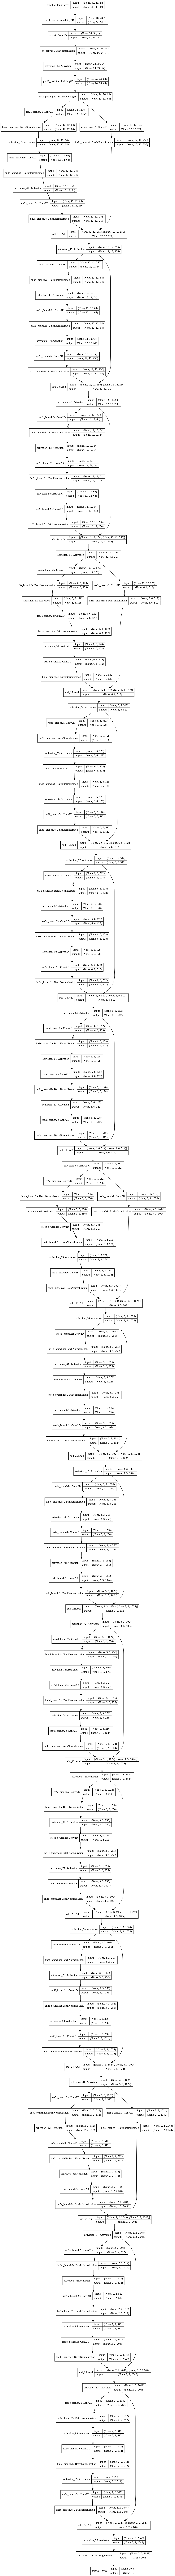

In [ ]:
# Plotting the architecture of defined model
plot_model(resnet50, to_file='resnet50.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile the model
resnet50.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
resnet50.summary() #gives the information about the architecture and configuration of the neural network.

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 1)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 24, 24, 64)   3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 24, 24, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

## Method 3: Xception :
[PAPER](https://arxiv.org/pdf/1610.02357.pdf)

![](https://www.researchgate.net/publication/342580102/figure/fig3/AS:908305815830530@1593568390179/Schematic-diagram-of-the-Xception-model.png)

**Modelling**

In [ ]:
# Building up model architecture
# Defining entry flow
def entry_flow(inputs) :
    
    x = Conv2D(32, 3, strides = 2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(64,3,padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    previous_block_activation = x
    
    for size in [64, 128, 256] :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = MaxPooling2D(3, strides=2, padding='same')(x)
        
        residual = Conv2D(size, 1, strides=2, padding='same')(previous_block_activation)
        
        x = keras.layers.Add()([x, residual])
        previous_block_activation = x
    
    return x

In [ ]:
# Defining middle flow
def middle_flow(x, num_blocks=8) :
    
    previous_block_activation = x
    
    for _ in range(num_blocks) :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = keras.layers.Add()([x, previous_block_activation])
        previous_block_activation = x
    
    return x

In [ ]:
# Defining exit flow
def exit_flow(x, num_classes=7) :
    
    previous_block_activation = x
    
    x = Activation('relu')(x)
    x = SeparableConv2D(256, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    
    residual = Conv2D(1024, 1, strides=2, padding='same')(previous_block_activation)
    x = keras.layers.Add()([x, residual])
      
    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    return x

In [ ]:
# creating input and output of model
inputs = Input(shape=(shape_x, shape_y, 1))
outputs = exit_flow(middle_flow(entry_flow(inputs)))

In [ ]:
# saving the model
xception = Model(inputs, outputs,name="Xception")

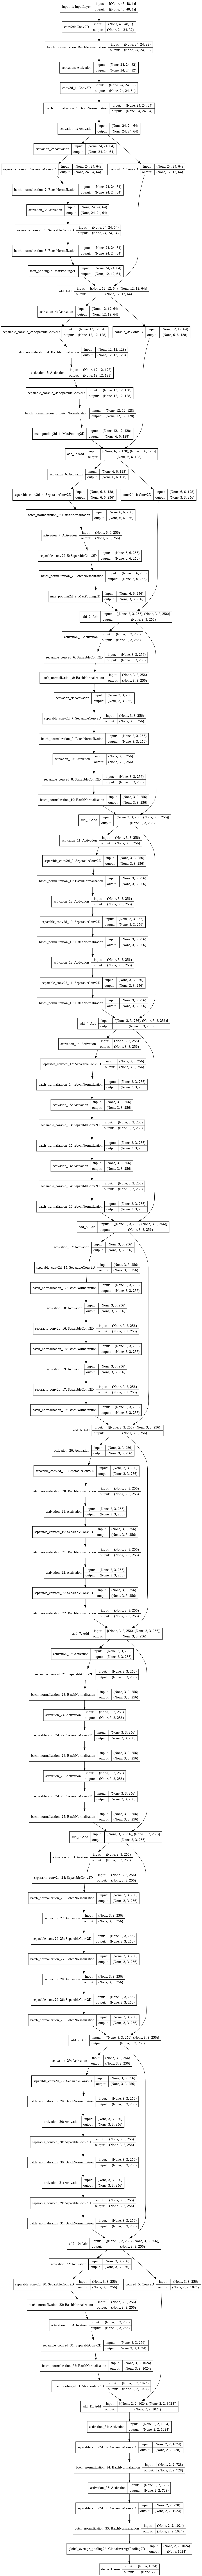

In [ ]:
# Plotting architecture of defined model
plot_model(xception, to_file='xception.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compiling the model
xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
xception.summary()  #gives the information about the architecture and configuration of the neural network.

Model: "Xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 24, 24, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 24, 24, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 24, 24, 32)   0           batch_normalization[0][0]        
___________________________________________________________________________________________

## Method 4: CNN inspired by Goodfellow I.J
[PAPER](https://arxiv.org/pdf/1307.0414.pdf)

![](https://raw.githubusercontent.com/NJNischal/Facial-Expression-Recognition-with-CNNs/9999cbdaa55542e86e11a9e129bafcfb96bd0e60/model.png)

In [ ]:
# Building up Model Architecture
def CNN():
    model = Sequential()

    #1st CNN layer
    model.add(Conv2D(64,(3,3),padding = 'same', name='image_array', input_shape = (48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    #2nd CNN layer
    model.add(Conv2D(128,(5,5),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

    #3rd CNN layer
    model.add(Conv2D(512,(3,3),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

    #4th CNN layer
    model.add(Conv2D(512,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    #Fully connected 1st layer
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))


    # Fully connected layer 2nd layer
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(num_classes, activation='softmax'))

    return model



In [ ]:
CNN=CNN()

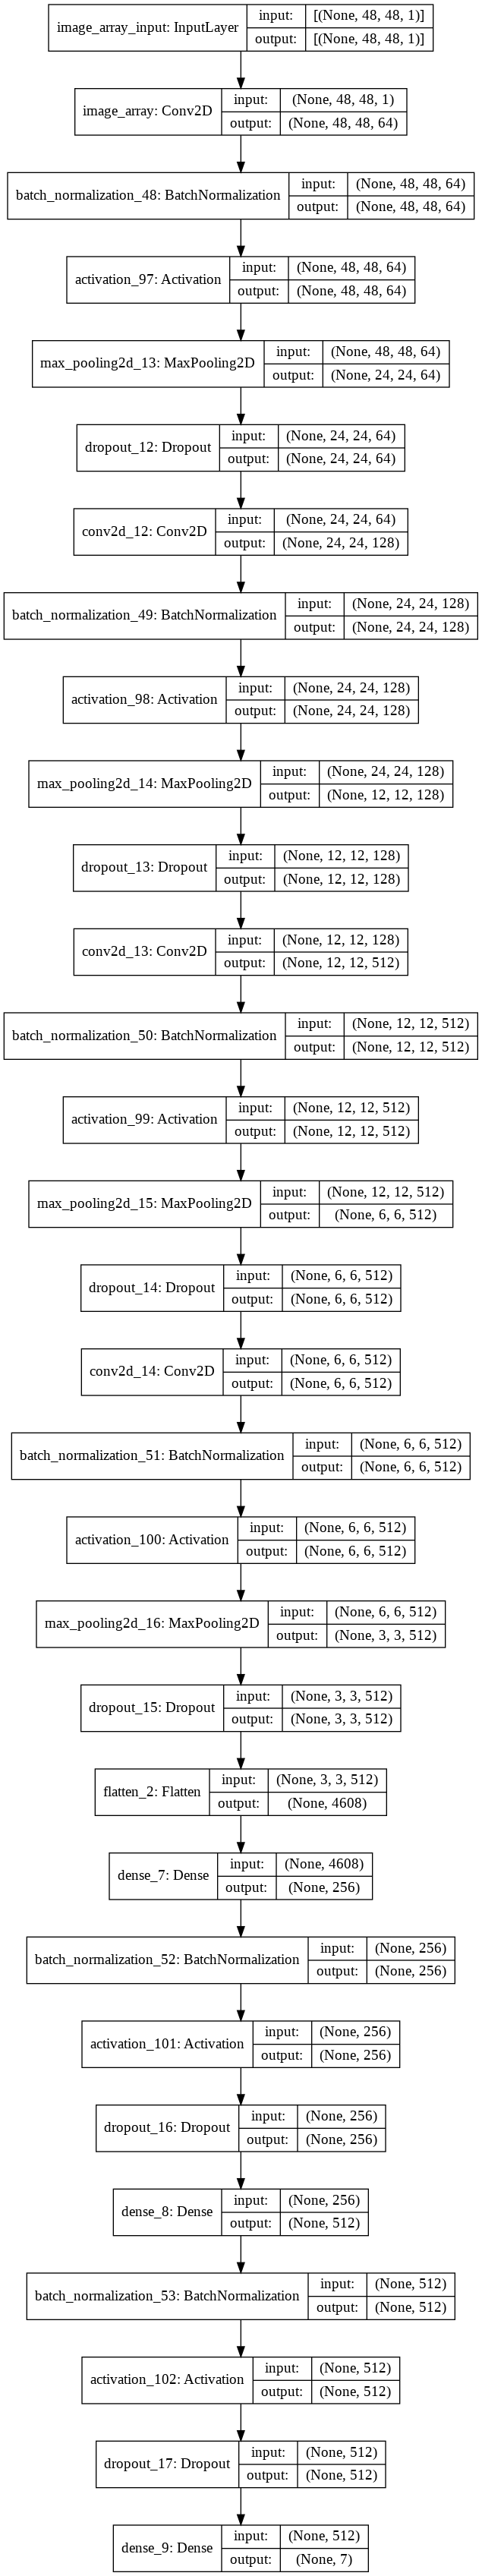

In [ ]:
# Plotting architecture of defined model
plot_model(CNN, to_file='CNN.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #using Adam Optimizer
CNN.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
CNN.summary() #gives the information about the architecture and configuration of the neural network.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_48 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_97 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_49 (Batc (None, 24, 24, 128)      

# Training 
## ResNet

In [ ]:
# Fitting the Model with Training and Validation Data
early_stop = EarlyStopping('val_loss', patience=50, min_delta=0, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=int(50/4), min_delta=0.00001,model='auto')
trained_models_path = base_path + '_Resnet'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [ ]:
# Fitting the resnet model
resnet_history =resnet50.fit(data_generator.flow(xtrain, ytrain, batch_size),
          steps_per_epoch=len(xtrain) / batch_size, 
          epochs=50, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(xtest,ytest))

Epoch 1/50
785/785 [==============================] - 108s 127ms/step - loss: 1.9627 - accuracy: 0.2615 - val_loss: 2.2509 - val_accuracy: 0.3479

Epoch 00001: val_loss improved from inf to 2.25088, saving model to models/_Resnet.01-0.35.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
785/785 [==============================] - 98s 124ms/step - loss: 1.7294 - accuracy: 0.3438 - val_loss: 1.7047 - val_accuracy: 0.3866

Epoch 00002: val_loss improved from 2.25088 to 1.70473, saving model to models/_Resnet.02-0.39.hdf5
Epoch 3/50
785/785 [==============================] - 99s 126ms/step - loss: 1.6008 - accuracy: 0.3921 - val_loss: 2.4659 - val_accuracy: 0.3519

Epoch 00003: val_loss did not improve from 1.70473
Epoch 4/50
785/785 [==============================] - 99s 126ms/step - loss: 1.5258 - accuracy: 0.4236 - val_loss: 2.1469 - val_accuracy: 0.3169

Epoch 00004: val_loss did not improve from 1.70473
Epoch 5/50
785/785 [==============================] - 97s 124ms/step - loss: 1.5830 - accuracy: 0.4201 - val_loss: 2.1153 - val_accuracy: 0.3045

Epoch 00005: val_loss did not improve from 1.70473
Epoch 6/50
785/785 [==============================] - 99s 126ms/step - loss: 1.5578 - accuracy: 0.4225 - val_loss: 1.3809 - val_accuracy: 0.4509

Epoch 00006: val_

**REMARK:**
It took around  70 to 80 minutes to run all 50 epochs.
The training gave the accuracy of 67% and val_accuracy of 63%. It seems good.

## Xception

In [ ]:
# Fitting the Model with Training and Validation Data
early_stop = EarlyStopping('val_loss', patience=50, min_delta=0, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=int(50/4), min_delta=0.0001,model='auto')
trained_models_path = base_path + '_Xception'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [ ]:
# Fitting the xception model
xception_history =xception.fit(data_generator.flow(xtrain, ytrain, batch_size),
          steps_per_epoch=len(xtrain) / batch_size, 
          epochs=70, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(xtest,ytest))

Epoch 1/70
785/785 [==============================] - 91s 67ms/step - loss: 1.6437 - accuracy: 0.3527 - val_loss: 1.8779 - val_accuracy: 0.3036

Epoch 00001: val_loss improved from inf to 1.87792, saving model to models/_Xception.01-0.30.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/70
785/785 [==============================] - 52s 66ms/step - loss: 1.4429 - accuracy: 0.4421 - val_loss: 1.9353 - val_accuracy: 0.3355

Epoch 00002: val_loss did not improve from 1.87792
Epoch 3/70
785/785 [==============================] - 51s 65ms/step - loss: 1.3489 - accuracy: 0.4880 - val_loss: 2.4285 - val_accuracy: 0.4543

Epoch 00003: val_loss did not improve from 1.87792
Epoch 4/70
785/785 [==============================] - 51s 65ms/step - loss: 1.2856 - accuracy: 0.5130 - val_loss: 1.2519 - val_accuracy: 0.5218

Epoch 00004: val_loss improved from 1.87792 to 1.25191, saving model to models/_Xception.04-0.52.hdf5
Epoch 5/70
785/785 [==============================] - 51s 65ms/step - loss: 1.2480 - accuracy: 0.5260 - val_loss: 1.8510 - val_accuracy: 0.3538

Epoch 00005: val_loss did not improve from 1.25191
Epoch 6/70
785/785 [==============================] - 51s 65ms/step - loss: 1.2028 - accuracy: 0.5433 - val_loss: 1.8991 - val_accuracy: 0.4079

Epoch 00006: val_los

It took around  45 to 50 minutes to run all epochs.
The training gave the accuracy of 76% approx and val_accuracy of 64%. 
It gives good prediction on train as well as test data.


# CNN

In [ ]:
# Fitting the Model with Training and Validation Data
early_stop = EarlyStopping('val_loss', patience=50)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=25, min_lr=0.00001,model='auto')
trained_models_path = base_path + 'CNN'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True, mode='max')
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [ ]:
# Fitting the CNN model
CNN_history =CNN.fit(data_generator.flow(xtrain, ytrain, batch_size),
          steps_per_epoch=len(xtrain) / batch_size,
          epochs=70, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(xtest,ytest))

Epoch 1/70
785/785 [==============================] - 31s 37ms/step - loss: 1.8370 - accuracy: 0.2862 - val_loss: 1.5395 - val_accuracy: 0.3989

Epoch 00001: val_loss improved from -inf to 1.53954, saving model to models/CNN.01-0.40.hdf5
Epoch 2/70
785/785 [==============================] - 29s 37ms/step - loss: 1.5269 - accuracy: 0.4089 - val_loss: 1.3499 - val_accuracy: 0.4763

Epoch 00002: val_loss did not improve from 1.53954
Epoch 3/70
785/785 [==============================] - 29s 37ms/step - loss: 1.3935 - accuracy: 0.4637 - val_loss: 1.2684 - val_accuracy: 0.5317

Epoch 00003: val_loss did not improve from 1.53954
Epoch 4/70
785/785 [==============================] - 28s 36ms/step - loss: 1.3223 - accuracy: 0.4947 - val_loss: 1.1950 - val_accuracy: 0.5518

Epoch 00004: val_loss did not improve from 1.53954
Epoch 5/70
785/785 [==============================] - 29s 36ms/step - loss: 1.2830 - accuracy: 0.5080 - val_loss: 1.1878 - val_accuracy: 0.5583

Epoch 00005: val_loss did not

It took around 30-35 minutes to run all 70 epochs.
The training gave the accuracy of 74% and val_accuracy of 69%. It seems good.

It seems like the training accuracy is low compare to test accuracy. 

# **Plotting Accuracy & Loss**

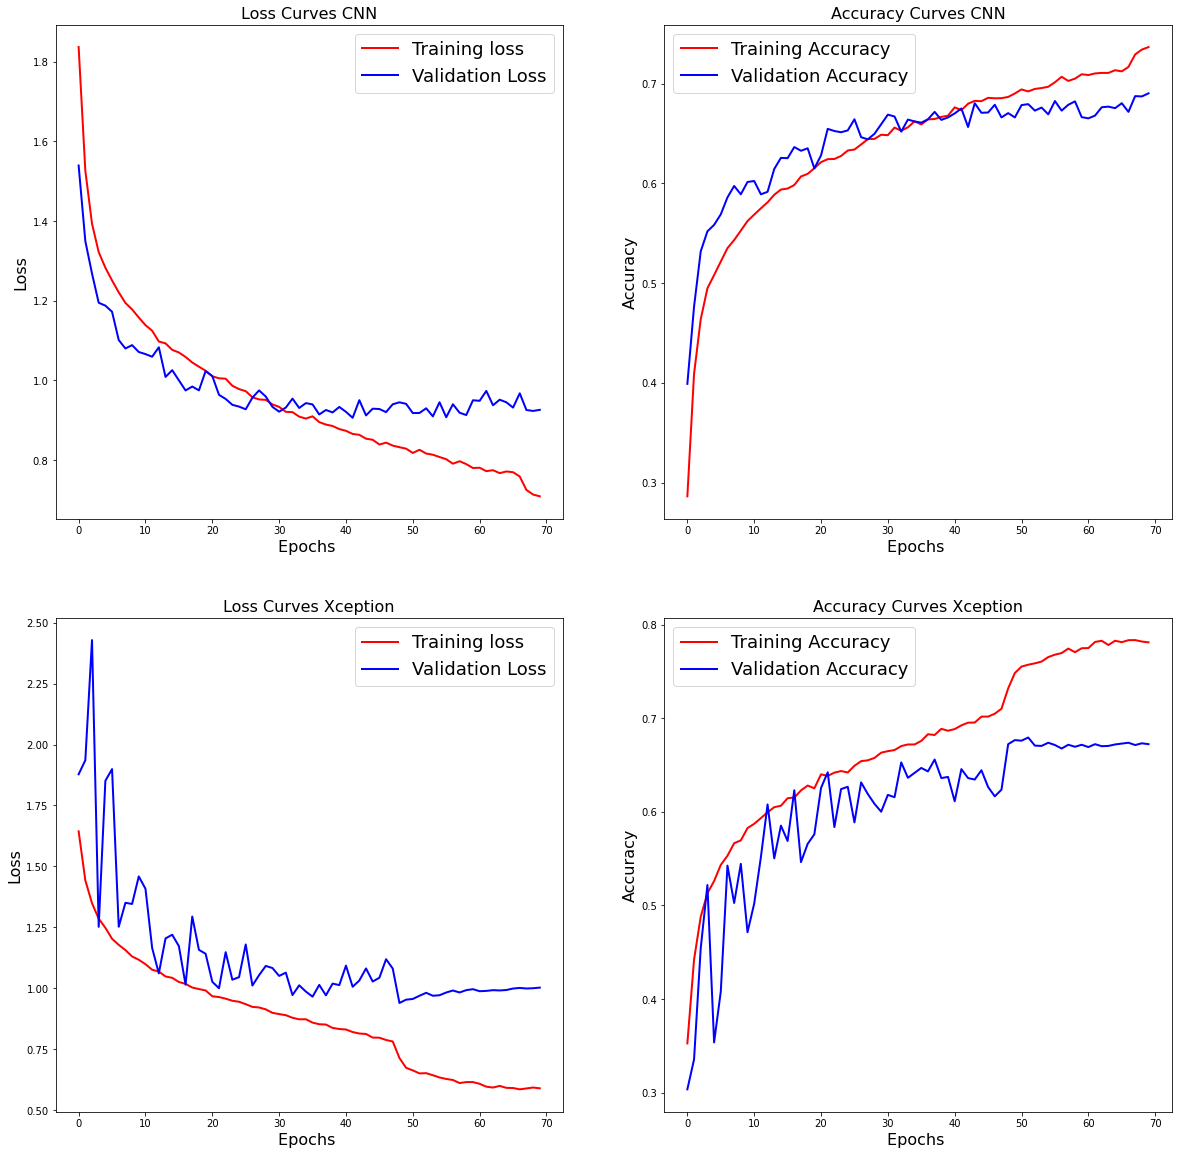

In [ ]:
# loss and accuracy curve for CNN and Xception model
fig,axes=plt.subplots(2,2,figsize=(20, 20))
for (m,history), ax in zip({'CNN':CNN_history,'Xception':xception_history}.items(),axes):
    # Loss Curves    
    ax[0].plot(history.history['loss'],'r',linewidth=2.0)
    ax[0].plot(history.history['val_loss'],'b',linewidth=2.0)
    ax[0].legend(['Training loss', 'Validation Loss'],fontsize=18)
    ax[0].set_xlabel('Epochs ',fontsize=16)
    ax[0].set_ylabel('Loss',fontsize=16)
    ax[0].set_title('Loss Curves '+m,fontsize=16)
 
    # Accuracy Curves
    ax[1].plot(history.history['accuracy'],'r',linewidth=2.0)
    ax[1].plot(history.history['val_accuracy'],'b',linewidth=2.0)
    ax[1].legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    ax[1].set_xlabel('Epochs ',fontsize=16)
    ax[1].set_ylabel('Accuracy',fontsize=16)
    ax[1].set_title('Accuracy Curves '+m,fontsize=16)

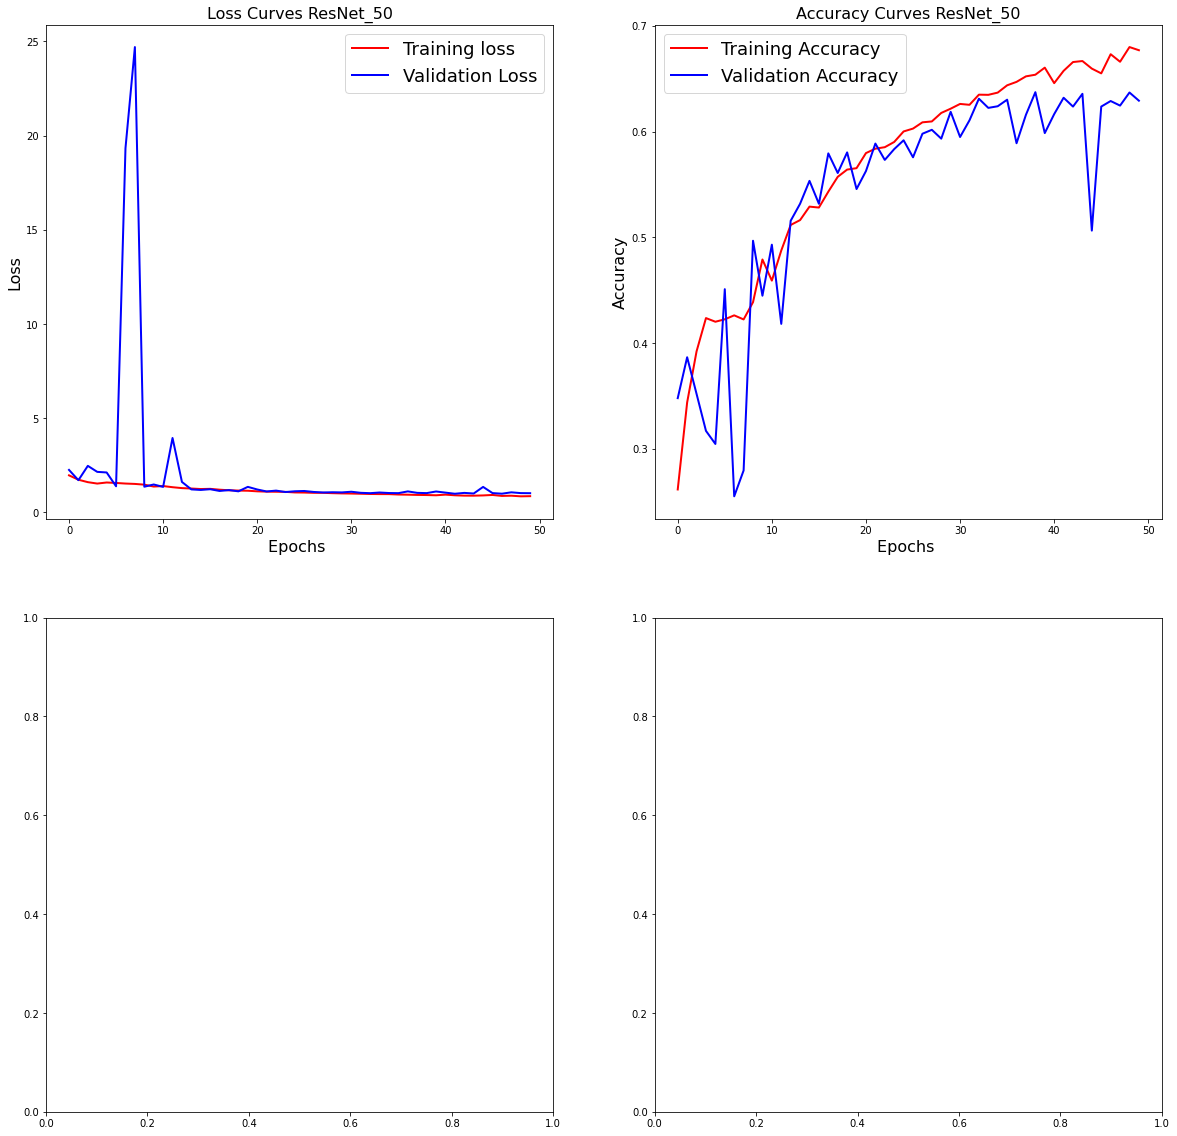

In [ ]:
# loss and accuracy curve for Resnet50 model
fig,axes=plt.subplots(2,2,figsize=(20, 20))
for (m,history), ax in zip({'ResNet_50':resnet_history}.items(),axes):
    # Loss Curves    
    ax[0].plot(history.history['loss'],'r',linewidth=2.0)
    ax[0].plot(history.history['val_loss'],'b',linewidth=2.0)
    ax[0].legend(['Training loss', 'Validation Loss'],fontsize=18)
    ax[0].set_xlabel('Epochs ',fontsize=16)
    ax[0].set_ylabel('Loss',fontsize=16)
    ax[0].set_title('Loss Curves '+m,fontsize=16)
 
    # Accuracy Curves
    ax[1].plot(history.history['accuracy'],'r',linewidth=2.0)
    ax[1].plot(history.history['val_accuracy'],'b',linewidth=2.0)
    ax[1].legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    ax[1].set_xlabel('Epochs ',fontsize=16)
    ax[1].set_ylabel('Accuracy',fontsize=16)
    ax[1].set_title('Accuracy Curves '+m,fontsize=16)

From above loss and accuracy plot it is seen that the accuracy & loss curve of Custom CNN model is gradually increasing and not crossing the training curve and has given the best accuracy.

In [ ]:
# saving the plot
plt.savefig('plots.png')

<Figure size 432x288 with 0 Axes>

# Classificastion Reports

In [ ]:
# Printing the classification report of all models
for model in [CNN,xception,resnet50]:
    ypred=model.predict(xtest)
    ypred_=np.argmax(ypred, axis=1)
    ytest_=np.argmax(ytest, axis=1)
    print(classification_report(ytest_, ypred_,digits=3))

              precision    recall  f1-score   support

           0      0.636     0.604     0.619       434
           1      0.600     0.656     0.627        32
           2      0.615     0.474     0.535       441
           3      0.878     0.865     0.871       837
           4      0.603     0.590     0.597       559
           5      0.777     0.753     0.765       380
           6      0.565     0.726     0.636       548

    accuracy                          0.690      3231
   macro avg      0.668     0.667     0.664      3231
weighted avg      0.694     0.690     0.689      3231

              precision    recall  f1-score   support

           0      0.593     0.581     0.587       434
           1      0.622     0.719     0.667        32
           2      0.529     0.476     0.501       441
           3      0.881     0.855     0.868       837
           4      0.585     0.546     0.565       559
           5      0.755     0.732     0.743       380
           6      0.579 

From above classification report it is seen that the Recall, Precision and f1 score of Custom CNN model is high compare to other models.

# Confusion Matrix

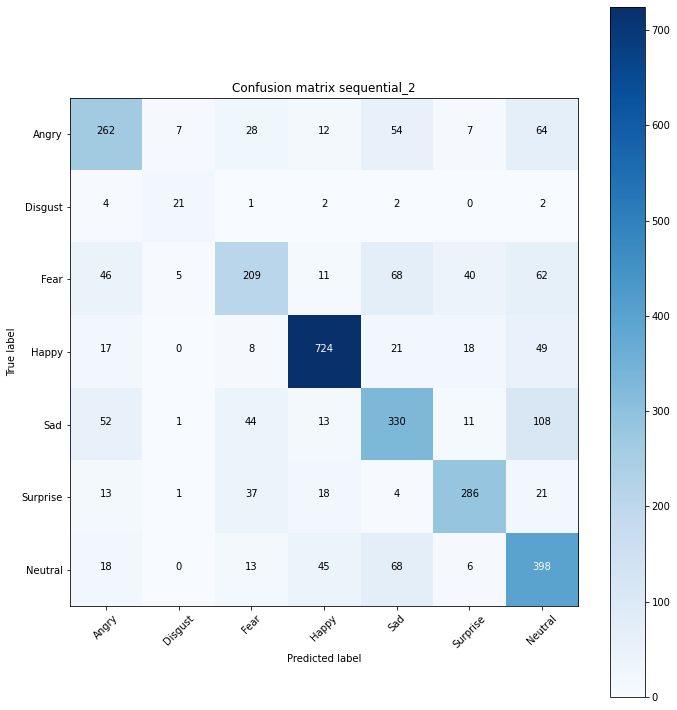

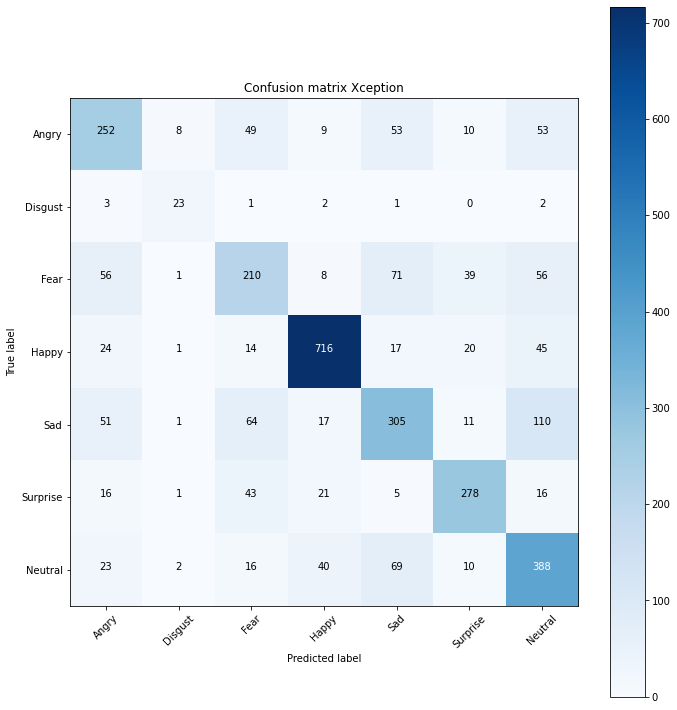

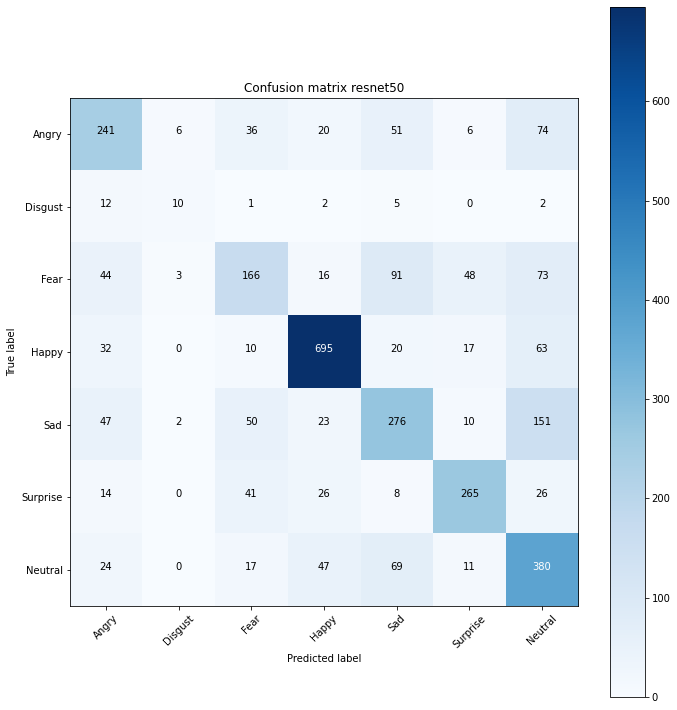

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure

# Printing the confusion matrix for each model
for model,i in zip([CNN,xception,resnet50],[1,2,3]):
    fig = figure(figsize=(10, 10))
    
    ypred=model.predict(xtest)
    rounded_predections=np.argmax(ypred, axis=1)
    rounded_labels=np.argmax(ytest, axis=1)
    cm = confusion_matrix(rounded_labels, rounded_predections)
    labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    title='Confusion matrix '+model.name
    

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    # Plotting labels
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('confusion_matrix_'+model.name+'.png')
    plt.show()
    

From the confusion metrix above we observe the emotiions that are correctly predicted w.r.t actual emotions. 

In all the confusion metrices the Custom CNN model has predicted most of the emotions correctly comapare to other models.

### Now we are going to use the **CNN** for live video face emotion recognition.

# **Real Time Video Face Detection Using Local Webcam**

In [ ]:
# Save best Model
CNN.save('Final_model.h5')

In [ ]:
# Saving model in json format along with weights
fer_json = CNN.to_json()  
with open("fer.json", "w") as json_file:  
    json_file.write(fer_json)  
CNN.save_weights("fer.h5")

In [ ]:
# importing dependencies
from IPython.display import display, Javascript, Image,clear_output
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# Defining function to detect face
def face_detect():
  import cv2
  from PIL import Image
  import numpy as np
  import os
  from keras.models import load_model
  from time import sleep
  from keras.preprocessing.image import img_to_array
  from keras.preprocessing import image
# start streaming video from webcam
  video_stream()
# label for video
  label_html = 'Capturing...'
# initialze bounding box to empty
  bbox = ''
  count = 0
  face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/gdrive/MyDrive/Almabetter/Module 6: Deep Learning/Capstone Project-5: Face Emotion Recognition/dat/haarcascade_frontalface_default.xml') # Face Detection
  classifier =load_model('/content/gdrive/MyDrive/Almabetter/Module 6: Deep Learning/Capstone Project-5: Face Emotion Recognition/dat/Final_model.h5')  #Load model
  emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise'] 

  while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
      break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),2)
      roi_gray = gray[y:y+h,x:x+w]
      roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)  ##Face Cropping for prediction
      if np.sum([roi_gray])!=0:
        roi = roi_gray.astype('float')/255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi,axis=0) ## reshaping the cropped face image for prediction
        prediction = classifier.predict(roi)[0]   #Prediction
        label=emotion_labels[prediction.argmax()]
        label_position = (x,y)
        cv2.putText(bbox_array,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)   # Text Adding
      else:
        cv2.putText(bbox_array,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

    



    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

In [ ]:
# Finally detecting the face with live webcam
face_detect()

<IPython.core.display.Javascript object>

# **Conclusion:**

When we started this project, we had two goals, namely, to achieve the highest accuracy and to apply FER models to the real world. We explored several models including shallow CNNs, Deepface, ResNet50, and Xception.

To alleviate FER2013’s inherent class imbalance, we employed class weights, data augmentation, and auxiliary datasets. By ensemble seven models we achieved 77% training accuracy and 69% accuracy for CNN model. We also found through network interpretability that our models learned to focus on relevant facial features for emotion detection.

Additionally, we demonstrated that FER models could be applied in the real world by developing a web application with real-time recognition speeds. It was interesting project and we learn lot from this project
